<a href="https://colab.research.google.com/github/victorluis22/metodos-numericos-otimizacao/blob/main/newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Newton

Algoritmo para minimizar funções unidimensionais usando derivadas.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plotFunction(min, max, step):
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.title(f'Gráfico da função')
  plt.grid(True)

  x_values = np.arange(min, max+step, step)
  y_values = [f(x) for x in x_values]

  plt.plot(x_values, y_values, label=f'f(x)')
  plt.legend()
  plt.show()

def f(x):
  function = "x**6"

  return eval(function)

def deriv_f(x, h):
  return (f(x + h) - f(x - h))/(2*h)

def deriv2_f(x, h):
  return (f(x-h) + f(x+h) - 2*f(x))/(h**2)

def newtonSearch(x):
  lmbda = x
  lmbda_next = 0
  e = 10**-6
  h = 10**-6
  time = 0

  while True:
    lmbda_next = lmbda - (deriv_f(lmbda, h) / deriv2_f(lmbda, h))

    addData(time, lmbda, lmbda_next, h)

    if abs(lmbda_next - lmbda) < e:
      return lmbda_next
    else:
      lmbda = lmbda_next

    time += 1


def addData (time, lmbda, lmbda_next, h):
  data['Iteração'].append(time)
  data['λ'].append(lmbda)
  data['θ\'(λ)'].append(deriv_f(lmbda, h))
  data['θ\'\'(λ)'].append(deriv2_f(lmbda, h))
  data['λk+1'].append(lmbda_next)

data = {
        'Iteração': [],
        'λ': [],
        'θ\'(λ)': [],
        'θ\'\'(λ)': [],
        'λk+1': [],
}

Mínimo encontrado = 5.071903270544436e-07



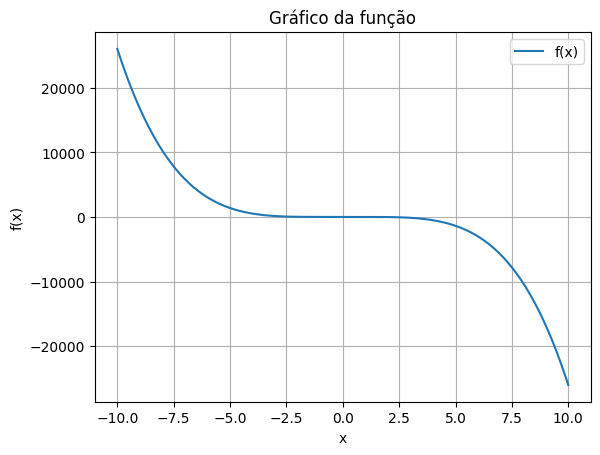

,Iteração,λ,θ'(λ),θ''(λ),λk+1
0,0,0.600000,1.728000e+00,1.440070,-5.999414e-01
1,1,-0.599941,1.727916e+00,-1.441181,5.990171e-01
2,2,0.599017,1.726575e+00,1.458722,-5.846048e-01
3,3,-0.584605,1.703599e+00,-1.726841,4.019362e-01
4,4,0.401936,1.159426e+00,3.830547,9.925725e-02
5,5,0.099257,1.064894e-01,2.027501,4.673476e-02
6,6,0.046735,2.498475e-02,1.043005,2.278018e-02
7,7,0.022780,6.085383e-03,0.528043,1.125577e-02
8,8,0.011256,1.503195e-03,0.265577,5.595667e-03
9,9,0.005596,3.736353e-04,0.133169,2.789939e-03


In [ ]:
a = -10
b = 10
minimun = newtonSearch(0.6)

print(f'Mínimo encontrado = {minimun}\n')

plotFunction(a, b, 0.1)

df = pd.DataFrame(data)
display(df)